In [1]:
import datetime
t0 =datetime.datetime.now() 

In [2]:
import numpy as np
from scipy.stats import norm, uniform, chi2
import matplotlib.pyplot as plt

In [3]:
def CharacterFunction(x):
    if x < 1 and x > -1:
        return 1
    else:
        return 0    

In [4]:
CharacterFunction(0.5)

1

In [5]:
def recK(x):
    return 0.5*CharacterFunction(x)
def triK(x):
    return (1 - abs(x))*CharacterFunction(x)
def paraK(x):
    return 0.75*(1 - x**2)*CharacterFunction(x)
def quarK(x):
    return 15/16*(1 - x**2)**2*CharacterFunction(x)
def GaussK(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)
def silK(x):
    return 0.5 * np.exp(-abs(x)/np.sqrt(2)) * np.sin(abs(x)/np.sqrt(2) + np.pi/4)

In [6]:
np.exp(0)

1.0

In [7]:
def KernelEstimation(data, typeKernel, h, x):
    '''
    data: 1D array
    typeKernel: 1: rectangular (uniform) Kernel
                2: triangle Kernel
                3: Epanechnikov (parabolic) Kernel
                4: Quartic (biweight) Kernel
                5: Gauss Kernel
                6: Silverman (Sil) Kernel
    h: bandwidth
    '''
    n = len(data)
    K = 0
    if typeKernel ==1:
        for X in data:
            K+= recK((X-x)/h)
    elif typeKernel ==2:
        for X in data:
            K+= triK((X-x)/h)
    elif typeKernel ==3:
        for X in data:
            K+= paraK((X-x)/h)
    elif typeKernel ==4:
        for X in data:
            K+= quarK((X-x)/h)
    elif typeKernel ==5:
        for X in data:
            K+= GaussK((X-x)/h)
    else:
        for X in data:
            K+= silK((X-x)/h)
    f = K / (n*h)
    return f

# 1. Thử với phân phối chuẩn

In [8]:
# tạo mảng phân phối chuẩn (mean, var)
mean = 0
var = 1
size = 1000
Xtrain = np.random.randn(size)

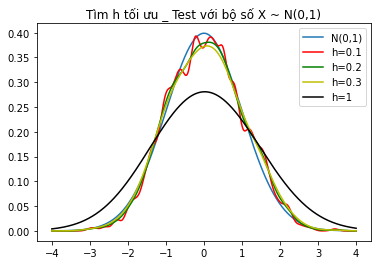

0:00:12.692896


In [9]:
t1 = datetime.datetime.now() 
Xtest = np.linspace(-4,4,1000)
plt.plot(Xtest, norm.pdf(Xtest), label='N(0,1)')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.1, x=x) for x in Xtest], 'r', label = 'h=0.1')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.2, x=x) for x in Xtest], 'g', label = 'h=0.2')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.3, x=x) for x in Xtest], 'y', label = 'h=0.3')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.4, x=x) for x in Xtest], 'c', label = 'h=0.4')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.5, x=x) for x in Xtest], 'm', label = 'h=0.5')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=1, x=x) for x in Xtest], 'k', label = 'h=1')
plt.legend()
plt.title('Tìm h tối ưu _ Test với bộ số X ~ N(0,1)')
plt.show()
t2 = datetime.datetime.now() 
print(t2-t1)

# => h=0.2 tối ưu

Text(0.5, 1.0, 'Tìm type tối ưu _ Test với bộ số X ~ N(0,1) _ h=0.2')

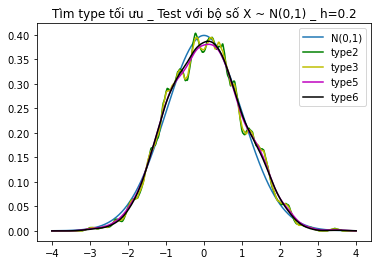

In [10]:
Xtest = np.linspace(-4,4,1000)
plt.plot(Xtest, norm.pdf(Xtest), label = 'N(0,1)')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.2, x=x) for x in Xtest], 'r', label = 'type1')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=2, h=0.2, x=x) for x in Xtest], 'g', label = 'type2')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=3, h=0.2, x=x) for x in Xtest], 'y', label = 'type3')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=4, h=0.2, x=x) for x in Xtest], 'c', label = 'type4')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.2, x=x) for x in Xtest], 'm', label = 'type5')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.2, x=x) for x in Xtest], 'k', label = 'type6')
plt.legend()
plt.title('Tìm type tối ưu _ Test với bộ số X ~ N(0,1) _ h=0.2')

# => h=0.2, phân phối 5,6 khớp nhất

# 2. Thử với phân phối đều

In [20]:
# tạo mảng phân phối đều (a, b)
a = 5
b = 10
size = 1000
Xtrain = np.random.uniform(a, b, size)

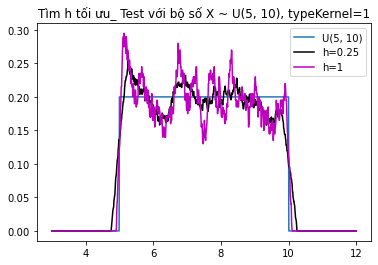

In [21]:
Xtest = np.linspace(a-2,b+2,1000)
plt.plot(Xtest, uniform.pdf(Xtest, a, b-a), label='U('+str(a)+', '+str(b)+')')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.1, x=x) for x in Xtest], 'r', label = 'h=0.1')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.2, x=x) for x in Xtest], 'g', label = 'h=0.2')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.25, x=x) for x in Xtest], 'k', label = 'h=0.25')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.3, x=x) for x in Xtest], 'y', label = 'h=0.3')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.4, x=x) for x in Xtest], 'c', label = 'h=0.4')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.5, x=x) for x in Xtest], 'aquamarine', label = 'h=0.5')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.1, x=x) for x in Xtest], 'm', label = 'h=1')
plt.legend()
plt.title('Tìm h tối ưu_ Test với bộ số X ~ U('+str(a)+', '+str(b)+'), typeKernel=1')
plt.show()

# => h~= 0.25 là tối ưu

Text(0.5, 1.0, 'Tìm type tối ưu _ Test với bộ số X ~ U(5, 10) _ h=0.25')

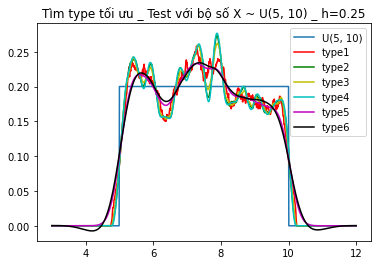

In [13]:
Xtest = np.linspace(a-2,b+2,1000)
plt.plot(Xtest, uniform.pdf(Xtest, a, b-a), label='U('+str(a)+', '+str(b)+')')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.25, x=x) for x in Xtest], 'r', label = 'type1')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=2, h=0.25, x=x) for x in Xtest], 'g', label = 'type2')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=3, h=0.25, x=x) for x in Xtest], 'y', label = 'type3')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=4, h=0.25, x=x) for x in Xtest], 'c', label = 'type4')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.25, x=x) for x in Xtest], 'm', label = 'type5')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.25, x=x) for x in Xtest], 'k', label = 'type6')
plt.legend()
plt.title('Tìm type tối ưu _ Test với bộ số X ~ U('+str(a)+', '+str(b)+') _ h=0.25')

# => h=0.25 là tối ưu, các type 5,6: oversmoothing, type1,2,3,4: tương tự nhau, không có sự khác biệt đáng kể

# 3. Thử với phân phối chi bình phương

In [22]:
# tạo mảng phân phối Chi2 (df)
df=9
size = 1000
Xtrain = np.random.chisquare(df, size)

Text(0.5, 1.0, 'Tìm type tối ưu _ Test với bộ số X ~ Chi2(df = 9)_ h=0.25')

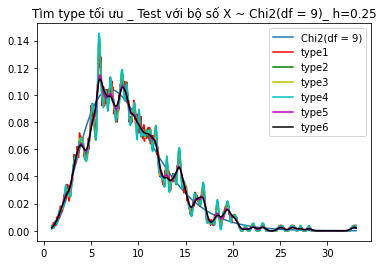

In [23]:
Xtest = np.linspace(min(Xtrain),max(Xtrain),1000)
plt.plot(Xtest, chi2.pdf(Xtest, df), label='Chi2(df = '+str(df)+')')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.25, x=x) for x in Xtest], 'r', label = 'type1')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=2, h=0.25, x=x) for x in Xtest], 'g', label = 'type2')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=3, h=0.25, x=x) for x in Xtest], 'y', label = 'type3')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=4, h=0.25, x=x) for x in Xtest], 'c', label = 'type4')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.25, x=x) for x in Xtest], 'm', label = 'type5')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.25, x=x) for x in Xtest], 'k', label = 'type6')
plt.legend()
plt.title('Tìm type tối ưu _ Test với bộ số X ~ Chi2(df = '+str(df)+')_ h=0.25')

#===> type 5,6 khớp tốt nhất

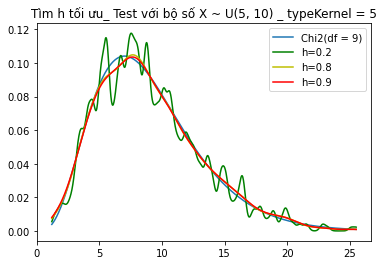

0:00:11.614641


In [16]:
Xtest = np.linspace(min(Xtrain),max(Xtrain),1000)
plt.plot(Xtest, chi2.pdf(Xtest, df), label='Chi2(df = '+str(df)+')')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.1, x=x) for x in Xtest], 'r', label = 'h=0.1')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.2, x=x) for x in Xtest], 'g', label = 'h=0.2')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.3, x=x) for x in Xtest], 'y', label = 'h=0.3')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.4, x=x) for x in Xtest], 'c', label = 'h=0.4')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.5, x=x) for x in Xtest], 'aquamarine', label = 'h=0.5')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.6, x=x) for x in Xtest], 'r', label = 'h=0.6')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.7, x=x) for x in Xtest], 'g', label = 'h=0.7')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.8, x=x) for x in Xtest], 'y', label = 'h=0.8')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.9, x=x) for x in Xtest], 'r', label = 'h=0.9')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.1, x=x) for x in Xtest], 'c', label = 'h=1')
plt.legend()
plt.title('Tìm h tối ưu_ Test với bộ số X ~ U('+str(a)+', '+str(b)+') _ typeKernel = 5')
plt.show()

# => type 5, h~=0.8 - 0.9 khớp tốt nhất

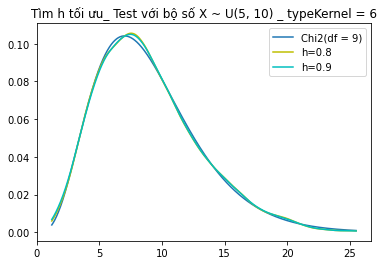

0:00:13.754196


In [17]:
t1 = datetime.datetime.now() 
Xtest = np.linspace(min(Xtrain),max(Xtrain),1000)
plt.plot(Xtest, chi2.pdf(Xtest, df), label='Chi2(df = '+str(df)+')')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.1, x=x) for x in Xtest], 'r', label = 'h=0.1')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.2, x=x) for x in Xtest], 'g', label = 'h=0.2')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.3, x=x) for x in Xtest], 'y', label = 'h=0.3')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.4, x=x) for x in Xtest], 'c', label = 'h=0.4')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.5, x=x) for x in Xtest], 'aquamarine', label = 'h=0.5')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.6, x=x) for x in Xtest], 'r', label = 'h=0.6')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.7, x=x) for x in Xtest], 'g', label = 'h=0.7')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.8, x=x) for x in Xtest], 'y', label = 'h=0.8')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.9, x=x) for x in Xtest], 'c', label = 'h=0.9')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=1, x=x) for x in Xtest], 'r', label = 'h=1')
plt.legend()
plt.title('Tìm h tối ưu_ Test với bộ số X ~ U('+str(a)+', '+str(b)+') _ typeKernel = 6')
plt.show()
t2 = datetime.datetime.now() 
print(t2-t1)

# => type6: h~= 0.9 khớp tốt nhất

0:00:11.035086


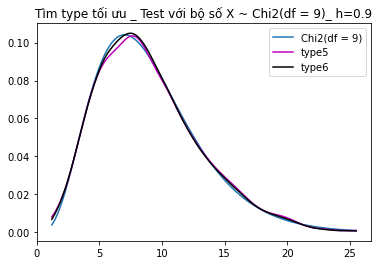

In [18]:
t1 = datetime.datetime.now() 
Xtest = np.linspace(min(Xtrain),max(Xtrain),1000)
plt.plot(Xtest, chi2.pdf(Xtest, df), label='Chi2(df = '+str(df)+')')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=1, h=0.9, x=x) for x in Xtest], 'r', label = 'type1')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=2, h=0.9, x=x) for x in Xtest], 'g', label = 'type2')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=3, h=0.9, x=x) for x in Xtest], 'y', label = 'type3')
# plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=4, h=0.9, x=x) for x in Xtest], 'c', label = 'type4')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=5, h=0.9, x=x) for x in Xtest], 'm', label = 'type5')
plt.plot(Xtest, [KernelEstimation(data=Xtrain,typeKernel=6, h=0.9, x=x) for x in Xtest], 'k', label = 'type6')
plt.legend()
plt.title('Tìm type tối ưu _ Test với bộ số X ~ Chi2(df = '+str(df)+')_ h=0.9')
t2 = datetime.datetime.now() 
print(t2-t1)

#===> type 6 và h~=0.9 khớp tốt nhất